In [28]:
from astropy.table import Table
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

POPSYCLE SIM

In [29]:
pops = Table.read("data/research_paper/popsycle_sim.fits").to_pandas()

In [30]:
arr = []
for i in range(len(pops)):
    if (pops["rem_id_L"][i] == 103 and (pops["mass_L"][i] > 2.5 and pops["mass_L"][i] < 6)): #.5 for added padding to mass gap
        arr.append(i) #lower mass gap of bhs is between 2.5 or so and 5-7

In [31]:
len(arr)

18

LIGO DATA

In [32]:
ligo = pd.concat([pd.read_csv("data/LIGO/GWTC-1-confident.csv"),pd.read_csv("data/LIGO/GWTC-2.1-confident.csv"),pd.read_csv("data/LIGO/GWTC-2.csv"), pd.read_csv("data/LIGO/GWTC-3-confident.csv")], axis=0).drop(columns=["id","commonName","version","catalog.shortName","jsonurl","reference","far_lower","far_upper","p_astro_lower","p_astro_upper","GPS"]).fillna(0)

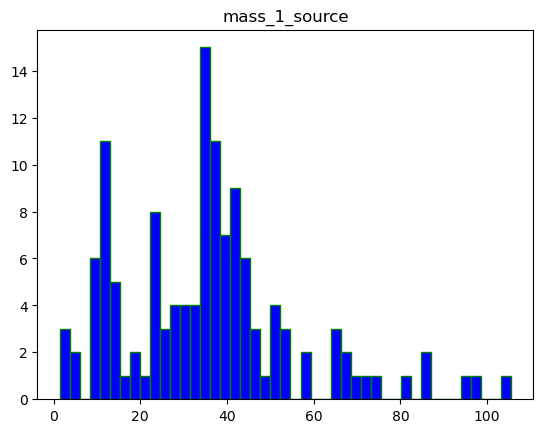

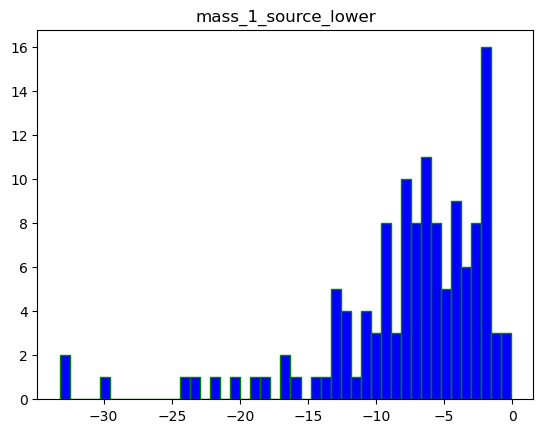

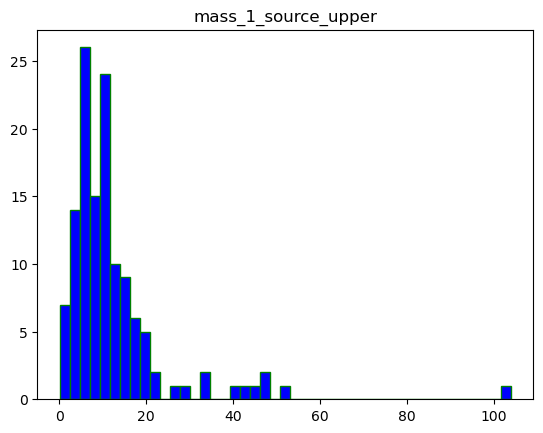

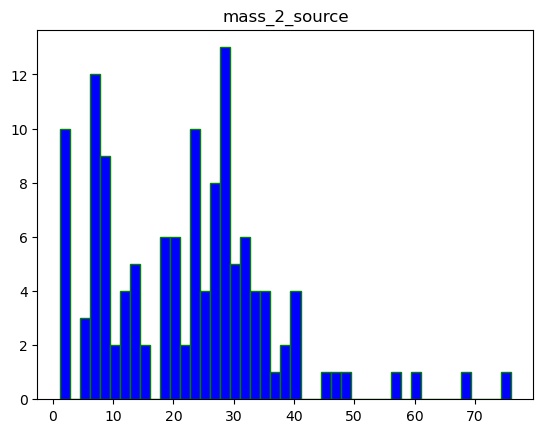

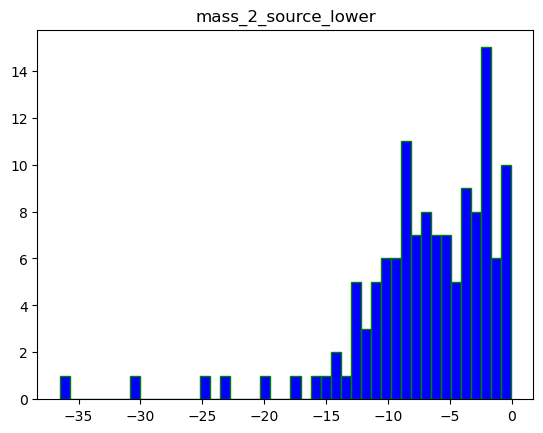

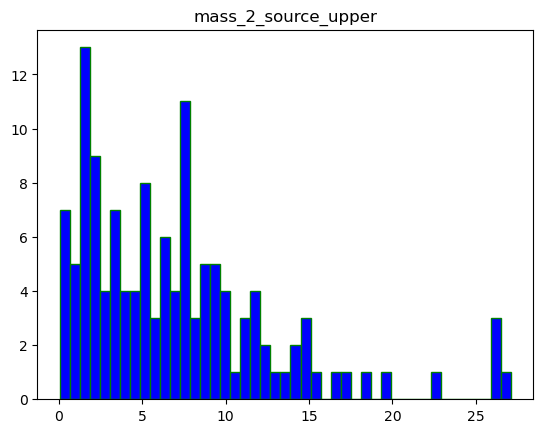

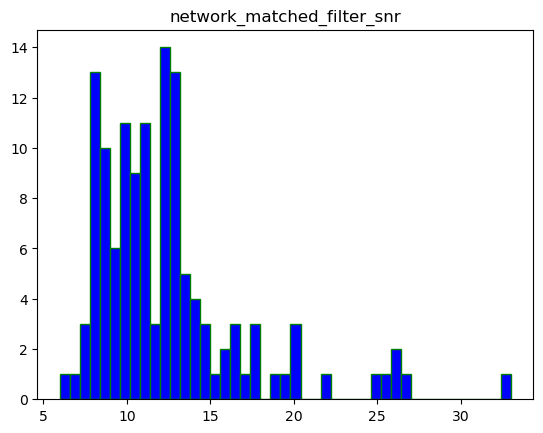

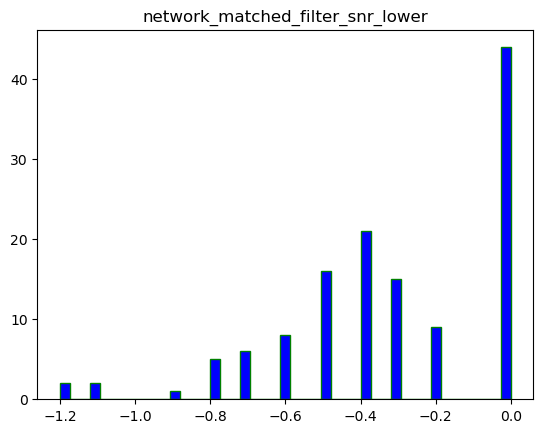

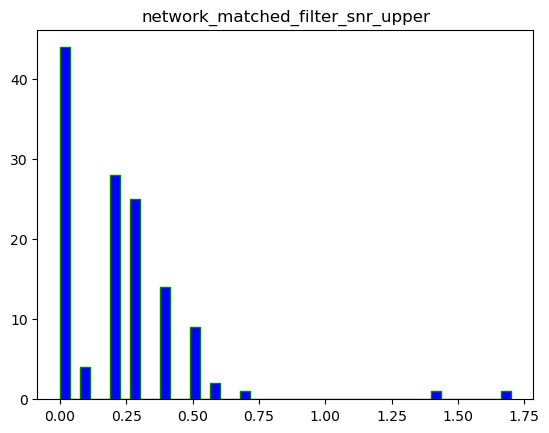

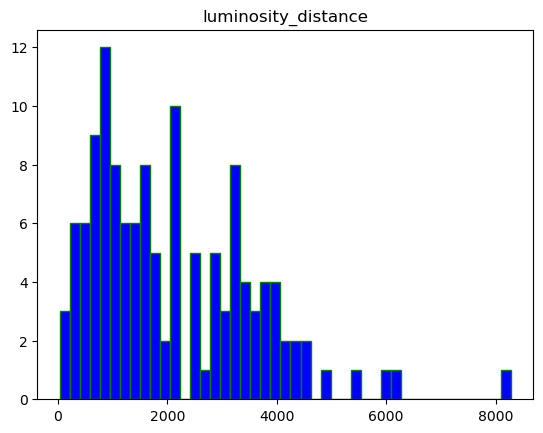

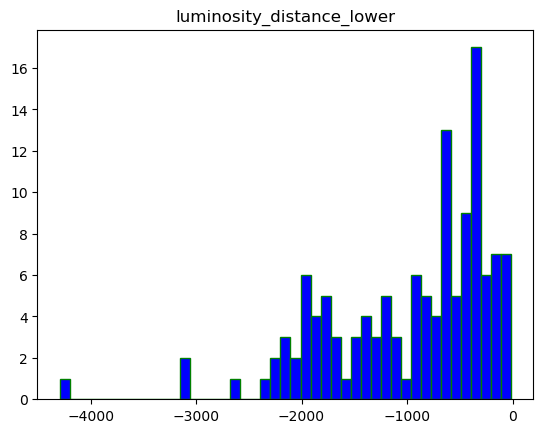

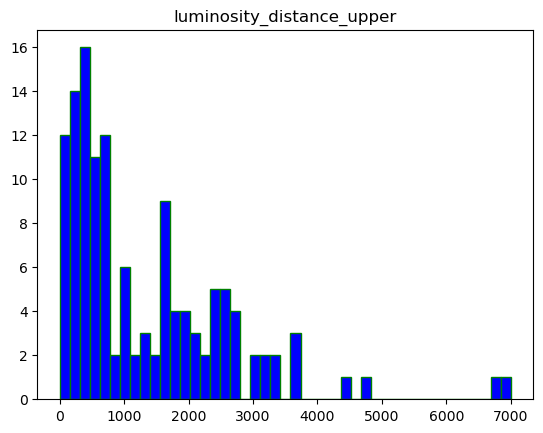

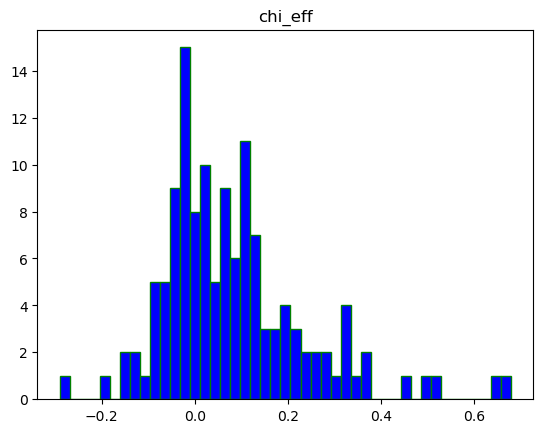

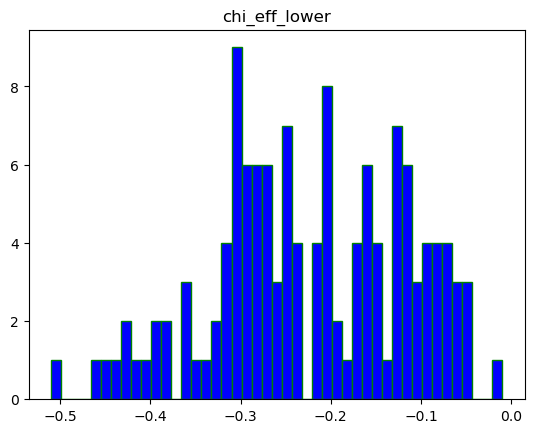

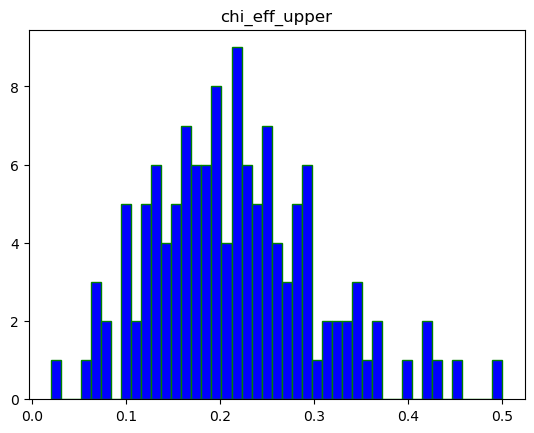

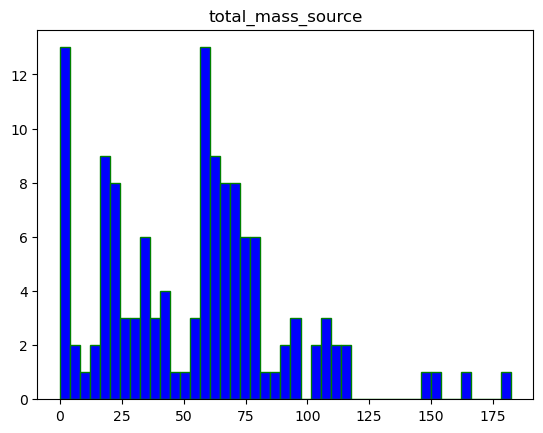

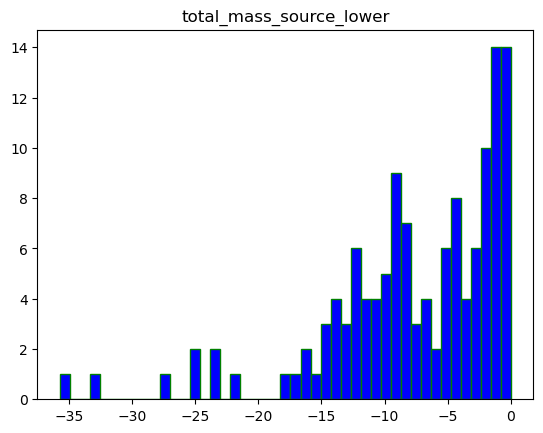

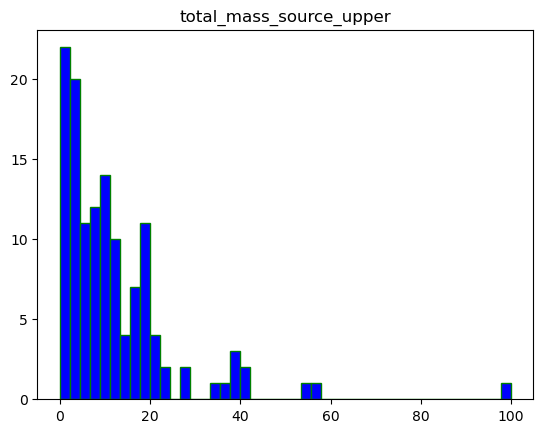

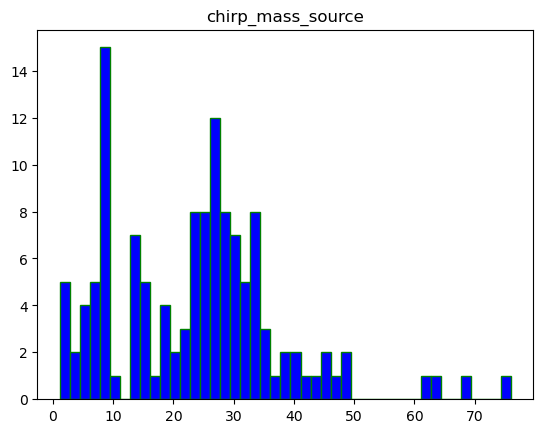

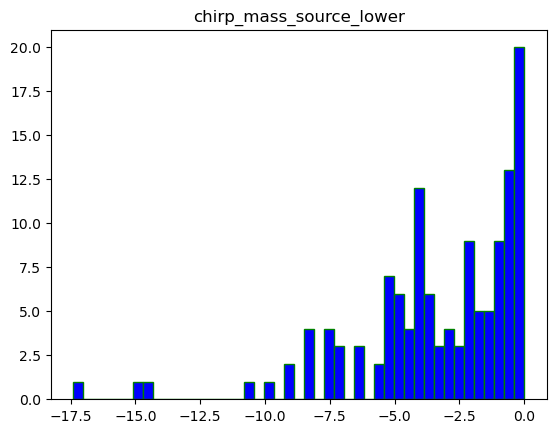

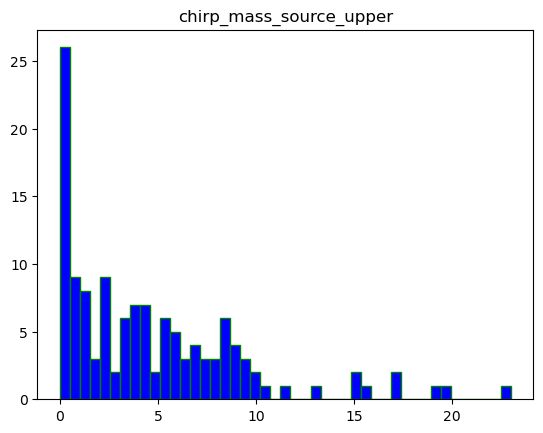

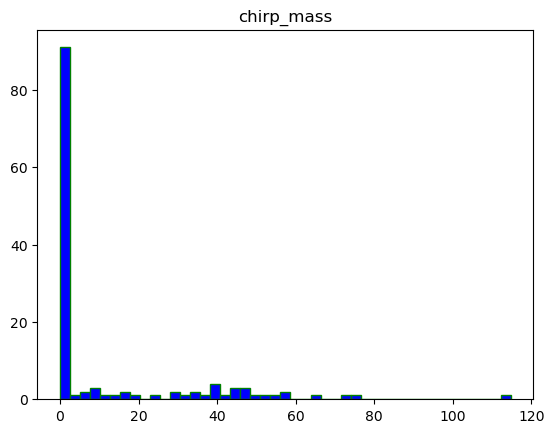

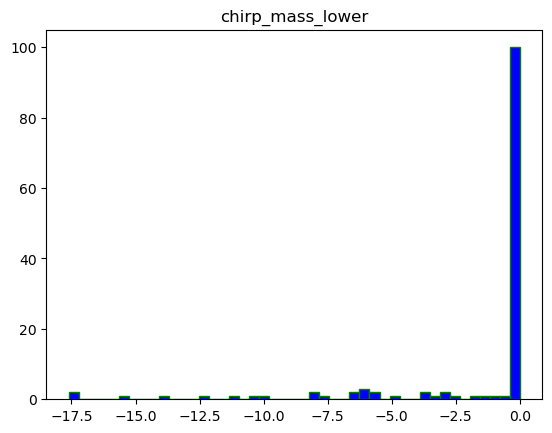

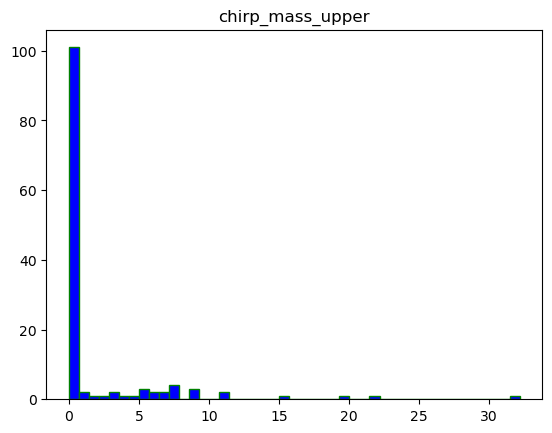

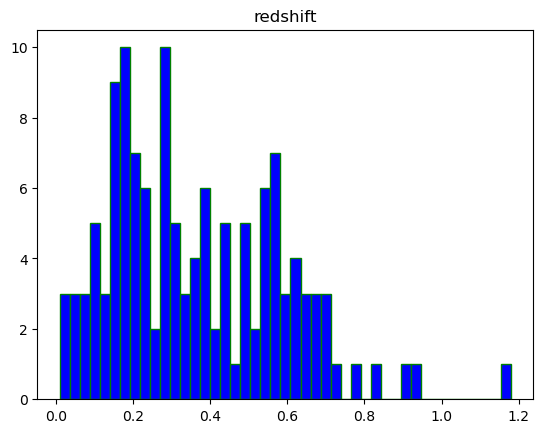

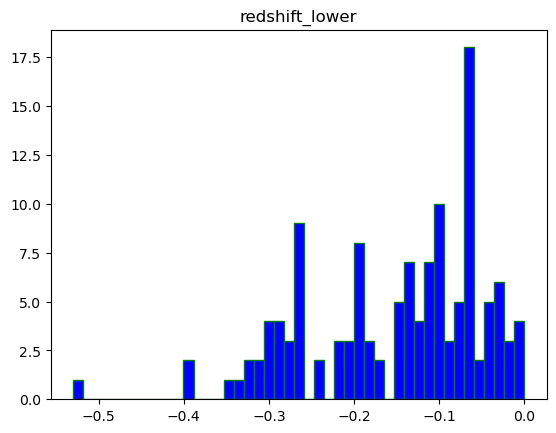

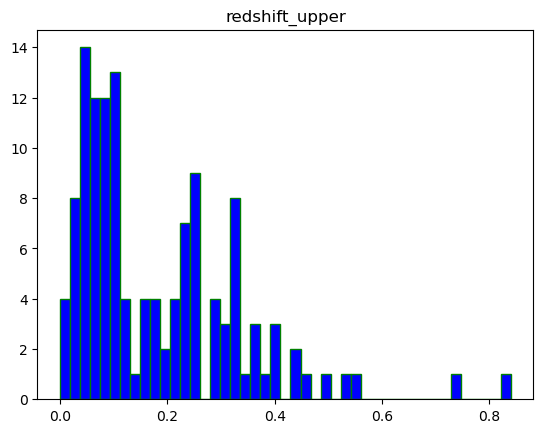

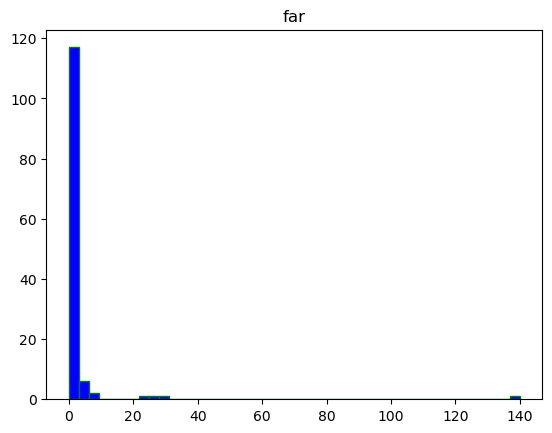

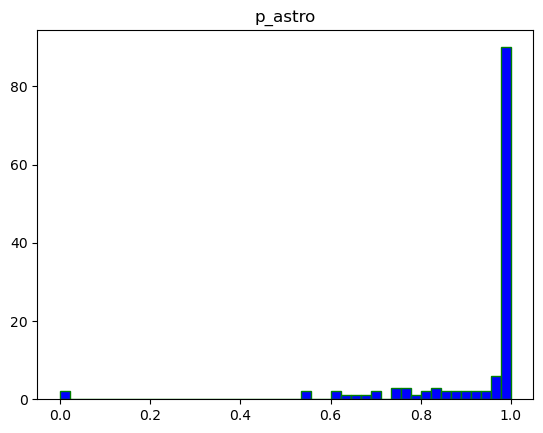

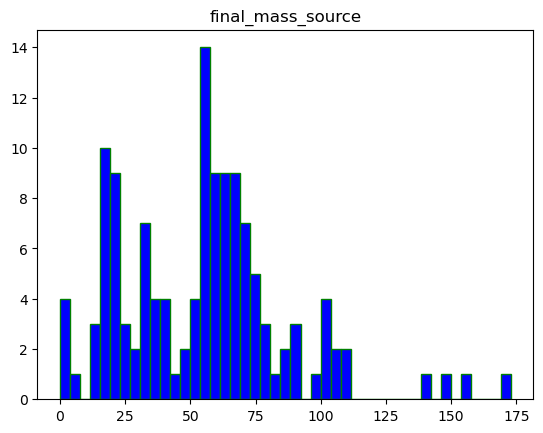

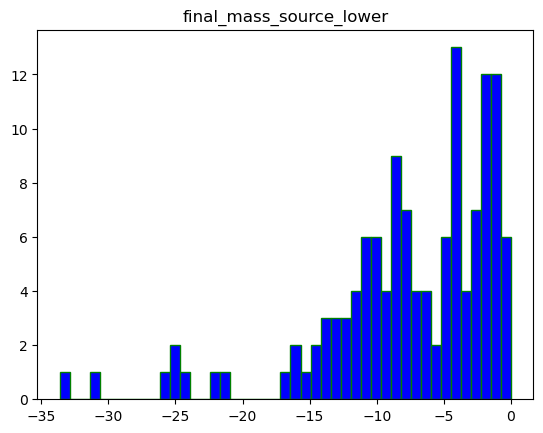

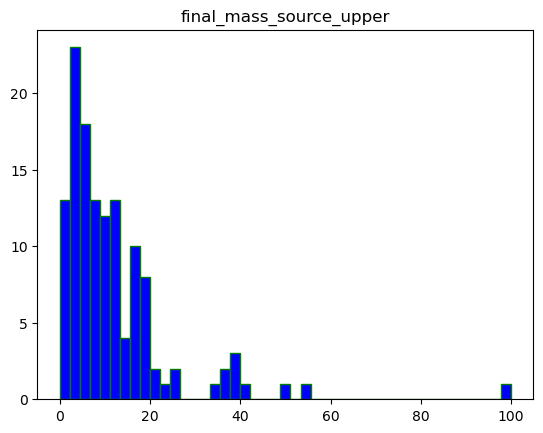

In [33]:
for col in ligo.columns:
    plt.hist(ligo[col],color="blue",edgecolor="green",bins=int(45/1))
    plt.title(col)
    plt.show()

In [34]:
ligoCols = list(ligo.columns)
popsCols = list(pops.columns)

In [35]:
popsCols

['rem_id_L',
 'mass_L',
 'rad_L',
 'glat_L',
 'glon_L',
 'vr_L',
 'mu_b_L',
 'mu_lcosb_L',
 'rem_id_S',
 'mass_S',
 'rad_S',
 'glat_S',
 'glon_S',
 'vr_S',
 'mu_b_S',
 'mu_lcosb_S',
 'theta_E',
 'u0',
 'mu_rel',
 't0',
 't_E',
 'pi_rel',
 'pi_E',
 'Imag_L',
 'Imag_S',
 'bsff_I']

In [36]:
ligoCols

['mass_1_source',
 'mass_1_source_lower',
 'mass_1_source_upper',
 'mass_2_source',
 'mass_2_source_lower',
 'mass_2_source_upper',
 'network_matched_filter_snr',
 'network_matched_filter_snr_lower',
 'network_matched_filter_snr_upper',
 'luminosity_distance',
 'luminosity_distance_lower',
 'luminosity_distance_upper',
 'chi_eff',
 'chi_eff_lower',
 'chi_eff_upper',
 'total_mass_source',
 'total_mass_source_lower',
 'total_mass_source_upper',
 'chirp_mass_source',
 'chirp_mass_source_lower',
 'chirp_mass_source_upper',
 'chirp_mass',
 'chirp_mass_lower',
 'chirp_mass_upper',
 'redshift',
 'redshift_lower',
 'redshift_upper',
 'far',
 'p_astro',
 'final_mass_source',
 'final_mass_source_lower',
 'final_mass_source_upper']

Corresponding features from popsycle to ligo following:

1. 